# Heuristics for signals with sparse first and second differences

We can estimate piecewise constant and piecewise linear functions by constructing cost functions that penalize the cardinality of the first- and second-order differences of a signal, respectively. The cardinality measure (sometimes called the $\ell_0$ norm) is simply the number of non-zero values. The $\ell_1$ norm is a common convex relaxation of the cardinality measure. 


Here we demonstrate two signal classes based on the $\ell_1$ heuristic: `SparseFirstDiffConvex` and `SparseSecondDiffConvex`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.optimize import minimize_scalar, minimize
from time import time
import seaborn as sns
sns.set_style('darkgrid')
import sys
sys.path.append('..')

In [2]:
from osd import Problem
from osd.components import GaussNoise, SparseFirstDiffConvex, SparseSecondDiffConvex
import cvxpy as cvx

## Example 1: Noisy Square Wave

In [3]:
np.random.seed(42)
t = np.linspace(0, 1000, 3000)
signal1 = signal.square(2 * np.pi * t * 1 / (450.))
y = signal1 + 0.25 * np.random.randn(len(signal1))

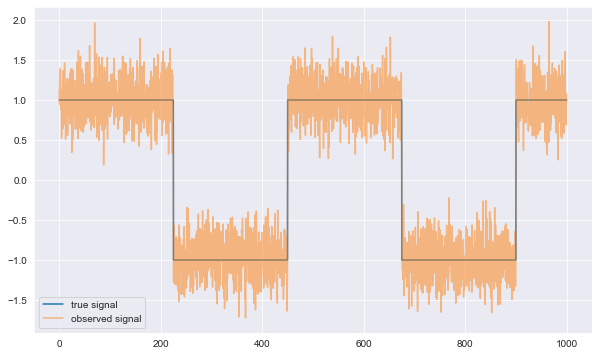

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='true signal')
plt.plot(t, y, alpha=0.5, label='observed signal')
plt.legend()
plt.show()

## Sparse First-Order Difference Heuristic

In [5]:
problem = Problem(data=y, components=[GaussNoise, SparseFirstDiffConvex])
problem.optimize_weights(solver='MOSEK')
problem.weights.value

array([ 1.        , 15.69500028])

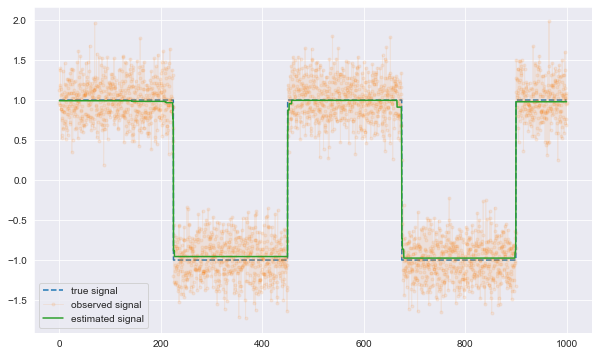

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='true signal', ls='--')
plt.plot(t, y, alpha=0.1, linewidth=1, marker='.', label='observed signal')
plt.plot(t, problem.estimates[1], label='estimated signal')
plt.legend()
plt.show()

In [7]:
problem.holdout_validation(solver='MOSEK', seed=42)

41.182211474451876

## Sparse Second-Order Difference Heuristic

In [8]:
problem = Problem(data=y, components=[GaussNoise, SparseSecondDiffConvex])
problem.optimize_weights(solver='MOSEK')
problem.weights.value

array([1.        , 2.90231568])

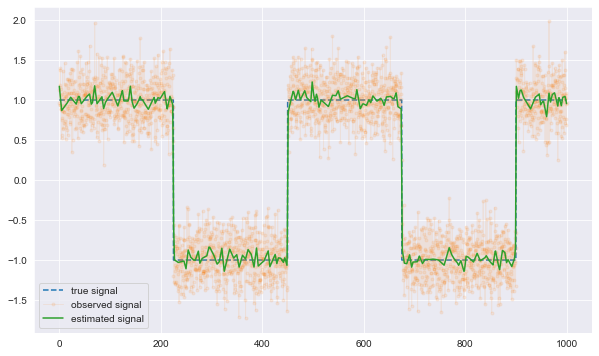

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='true signal', ls='--')
plt.plot(t, y, alpha=0.1, linewidth=1, marker='.', label='observed signal')
plt.plot(t, problem.estimates[1], label='estimated signal')
plt.legend()
plt.show()

In [10]:
problem.holdout_validation(solver='MOSEK', seed=42)

41.07194978598811

## Example 2: Noisy Triangle Wave

In [11]:
np.random.seed(42)
t = np.linspace(0, 1000, 3000)
signal1 = np.abs(signal.sawtooth(2 * np.pi * t * 1 / (500.)))
y = signal1 + 0.25 * np.random.randn(len(signal1))

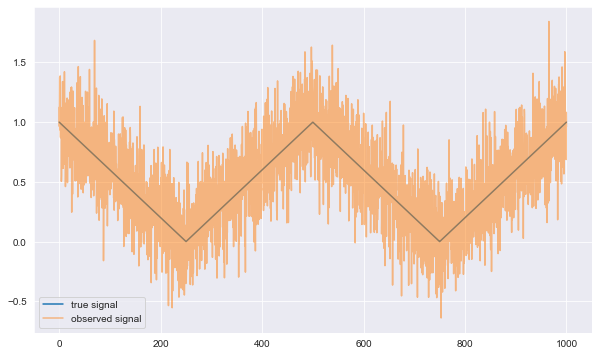

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='true signal')
plt.plot(t, y, alpha=0.5, label='observed signal')
plt.legend()
plt.show()

## Sparse First-Order Difference Heuristic

In [13]:
problem = Problem(data=y, components=[GaussNoise, SparseFirstDiffConvex])
problem.optimize_weights(solver='MOSEK')
problem.weights.value

array([1.        , 7.34731765])

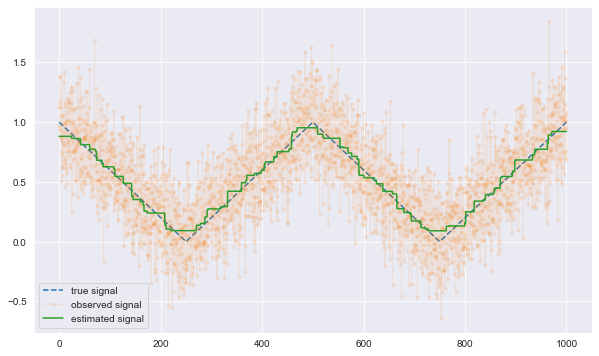

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='true signal', ls='--')
plt.plot(t, y, alpha=0.1, linewidth=1, marker='.', label='observed signal')
plt.plot(t, problem.estimates[1], label='estimated signal')
plt.legend()
plt.show()

In [15]:
problem.holdout_validation(solver='MOSEK', seed=42)

37.23321541820327

## Sparse Second-Order Difference Heuristic

In [16]:
problem = Problem(data=y, components=[GaussNoise, SparseSecondDiffConvex])
problem.optimize_weights(solver='MOSEK')
problem.weights.value

array([  1.        , 116.78647239])

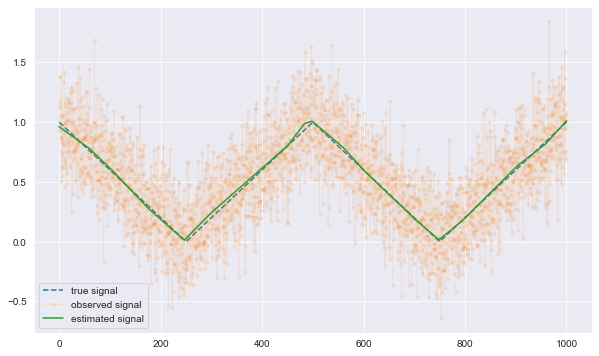

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='true signal', ls='--')
plt.plot(t, y, alpha=0.1, linewidth=1, marker='.', label='observed signal')
plt.plot(t, problem.estimates[1], label='estimated signal')
plt.legend()
plt.show()

In [18]:
problem.holdout_validation(solver='MOSEK', seed=42)

36.96394970822733